In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head(15).style.set_properties(
    **{
         'background-color': 'Lightblue',
         'color': 'black',
         'border-color': 'white'
    })


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.600000,0.127000,47,1
1,0,84,82,31,125,38.200000,0.233000,23,0
2,0,145,0,0,0,44.200000,0.630000,31,1
3,0,135,68,42,250,42.300000,0.365000,24,1
4,1,139,62,41,480,40.700000,0.536000,21,0
5,0,173,78,32,265,46.500000,1.159000,58,0
6,4,99,72,17,0,25.600000,0.294000,28,0
7,8,194,80,0,0,26.100000,0.551000,67,0
8,2,83,65,28,66,36.800000,0.629000,24,0
9,2,89,90,30,0,33.500000,0.292000,42,0


In [3]:
print('Shape of Diabetes dataset is :',dataframe.shape)
print('Size of Diabetes dataset is  :',dataframe.size)

Shape of Diabetes dataset is : (2000, 9)
Size of Diabetes dataset is  : 18000


In [4]:
print(f'This Diabetes dataset has {dataframe.shape[0]} instances with the {dataframe.shape[1]-1} features and 1 output variable')


This Diabetes dataset has 2000 instances with the 8 features and 1 output variable


In [5]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Drop if there are duplicates rows.
dataframe = dataframe.drop_duplicates()

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


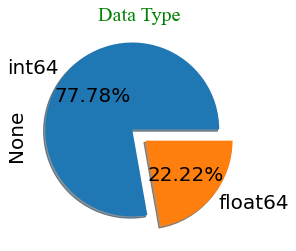

In [8]:
plt.rcParams.update({'font.size': 20})

dataframe.dtypes.value_counts().plot.pie(explode=[0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center',
          font='Times New Roman');

In [9]:
dataframe.describe().style.set_properties(
    **{
         'background-color': 'Lightblue',
         'color': 'black',
         'border-color': 'white'
    })

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<AxesSubplot:>

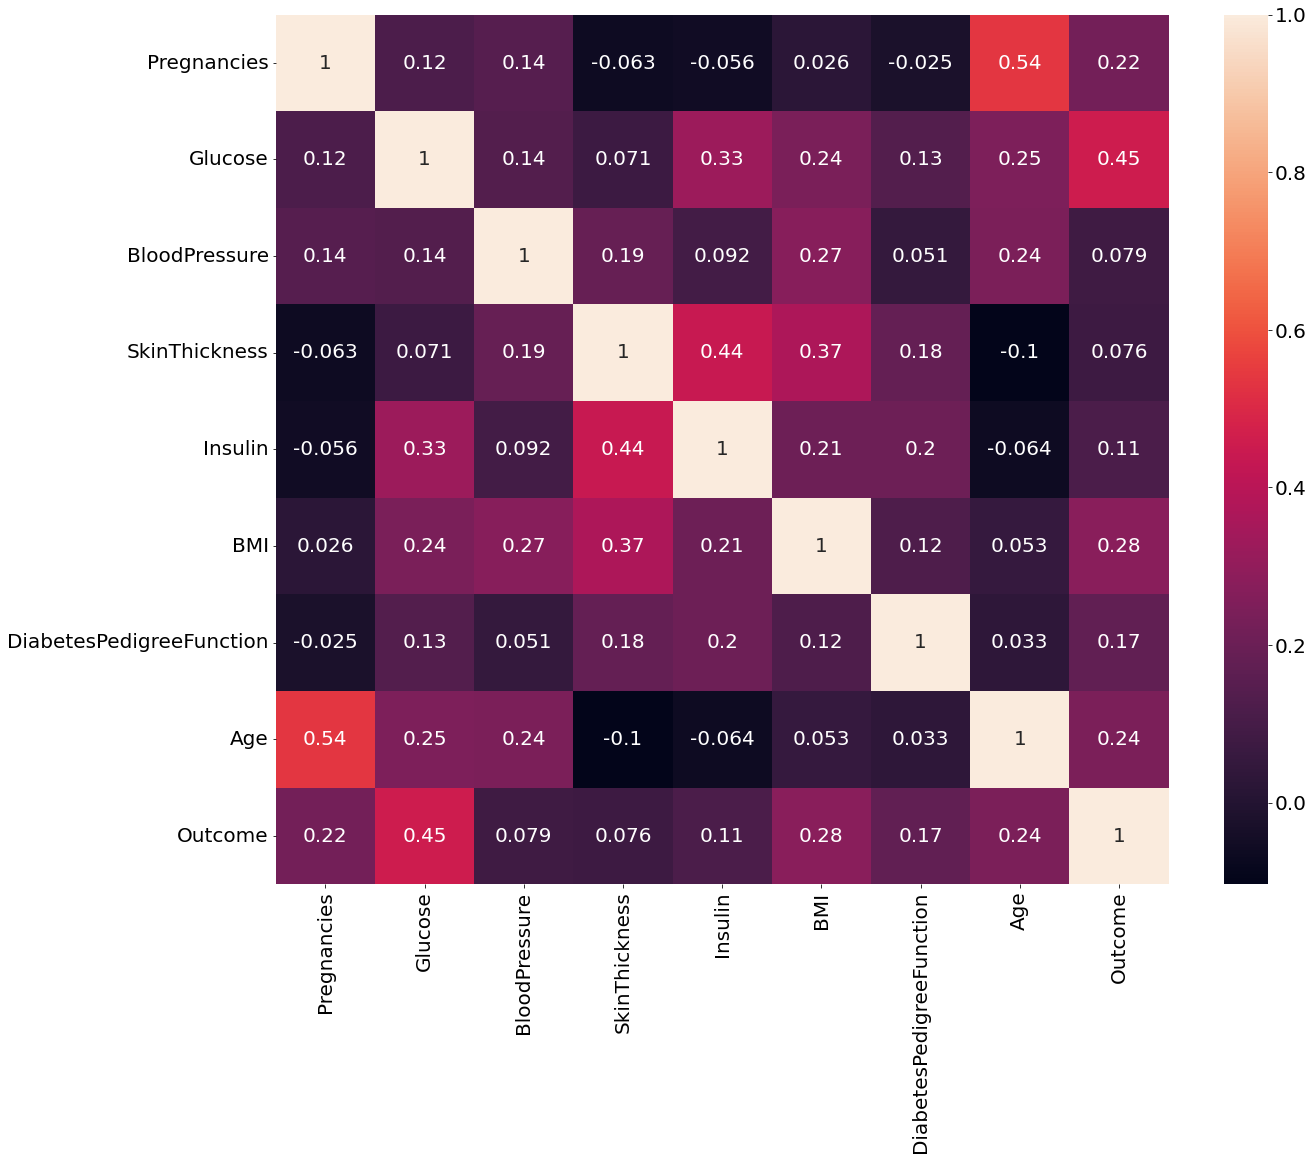

In [10]:
plt.figure(figsize=(20,16))
corrmat=dataframe.corr()
sns.heatmap(corrmat, annot=True)

In [11]:
# show how many columns has 0 values and sum it

featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose            5
BloodPressure     34
SkinThickness    215
Insulin          359
BMI               10
dtype: int64


In [12]:
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())#normal distribution
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())#normal distribution
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())#skewed distribution
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())#skewed distribution
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].median())#skewed distribution

In [13]:
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [14]:
# !pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


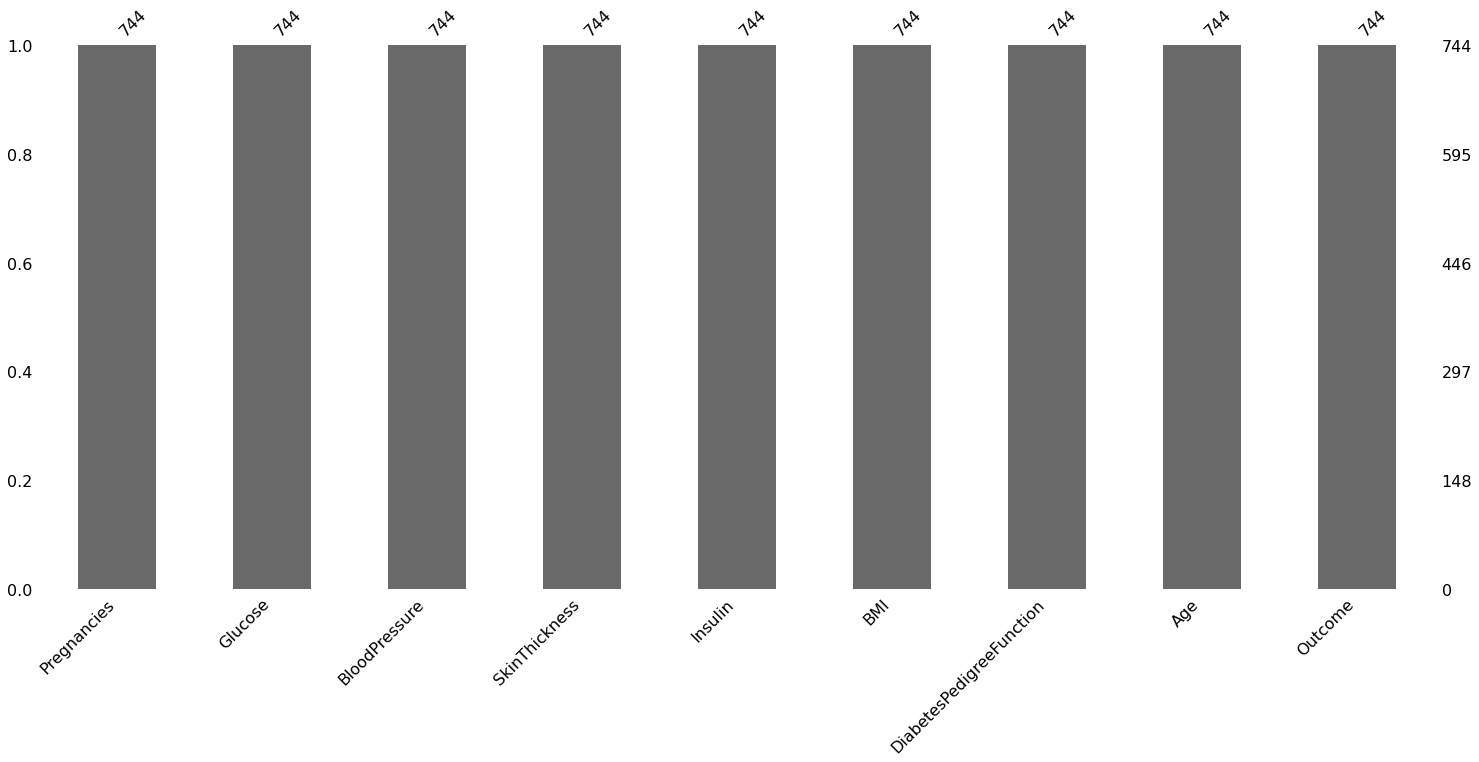

In [15]:
# check for Null values 
import missingno as msno
msno.bar(dataframe)
plt.show()

In [16]:
# replacing the value 0 and 1 in column name Outcome for readability
dataframe["Outcome"].replace(0,"Non-Diabetic",inplace=True) 
dataframe["Outcome"].replace(1,"Diabetic",inplace=True)
dataframe["Outcome"]


0           Diabetic
1       Non-Diabetic
2           Diabetic
3           Diabetic
4       Non-Diabetic
            ...     
1564    Non-Diabetic
1565    Non-Diabetic
1566        Diabetic
1567    Non-Diabetic
1568    Non-Diabetic
Name: Outcome, Length: 744, dtype: object

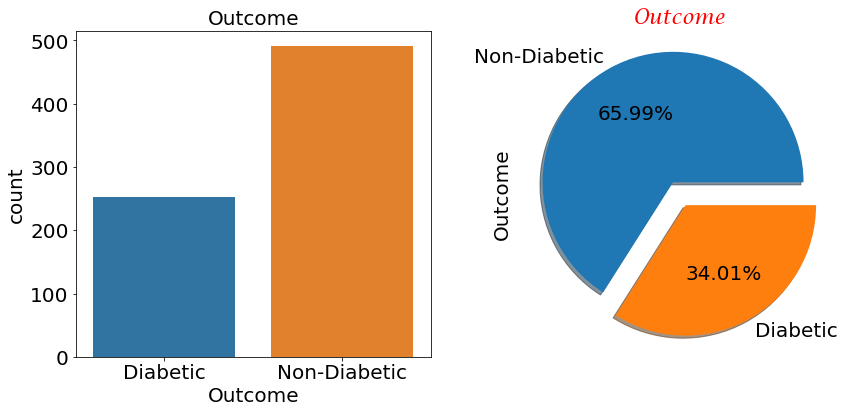

In [17]:
# plot the no of patients 
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outcome', data=dataframe)
# ax.bar_label(ax.containers[0])
plt.title("Outcome", fontsize=20)

ax =plt.subplot(1,2,2)
ax=dataframe['Outcome'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outcome", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [18]:
# for my analysis purpose i am saving the diabetic and non-diabetic data in different variables.
Diabetic = dataframe[dataframe["Outcome"]=="Diabetic"]
Non_diabetic = dataframe[dataframe["Outcome"]=="Non-Diabetic"]

In [19]:
Diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35,36,33.6,0.127,47,Diabetic
2,0,145.0,68.959677,23,36,44.2,0.630,31,Diabetic
3,0,135.0,68.000000,42,250,42.3,0.365,24,Diabetic
11,4,125.0,70.000000,18,122,28.9,1.144,45,Diabetic
16,7,195.0,70.000000,33,145,25.1,0.163,55,Diabetic


In [20]:
Diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,4.778656,142.034723,75.167570,29.988142,116.011858,35.534783,0.551680,37.102767
std,3.746747,29.020091,11.906577,9.986690,116.909424,6.731563,0.363778,11.094351
min,0.000000,80.000000,30.000000,7.000000,14.000000,20.100000,0.088000,21.000000
25%,1.000000,120.000000,68.000000,23.000000,36.000000,31.200000,0.268000,28.000000
50%,4.000000,139.000000,74.000000,27.000000,36.000000,34.300000,0.447000,36.000000
75%,8.000000,166.000000,82.000000,36.000000,167.000000,39.000000,0.734000,44.000000
max,17.000000,199.000000,114.000000,99.000000,600.000000,67.100000,2.420000,70.000000


In [21]:
Non_diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,3.224033,111.229486,70.536118,26.301426,87.061100,31.184521,0.431481,31.101833
std,2.971070,25.310026,11.856492,9.515979,88.969843,7.132810,0.297232,11.568157
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,94.000000,62.000000,22.000000,36.000000,25.900000,0.232000,23.000000
50%,2.000000,108.000000,70.000000,23.000000,42.000000,30.700000,0.338000,27.000000
75%,5.000000,125.000000,78.000000,31.000000,105.500000,35.350000,0.571500,37.000000
max,13.000000,197.000000,122.000000,110.000000,744.000000,80.600000,2.329000,81.000000


In [22]:
x1=len(dataframe[dataframe["Glucose"]<=140])
x2=len(dataframe[(dataframe["Glucose"]>140)&(dataframe["Glucose"]<=199)])
x3=len(dataframe[dataframe["Glucose"]>=200])
print("patient count having normal Blood sugar :",x1)
print("patient count having prediabetes :",x2)
print("patient count having abnormal glucose :",x3)

patient count having normal Blood sugar : 558
patient count having prediabetes : 186
patient count having abnormal glucose : 0


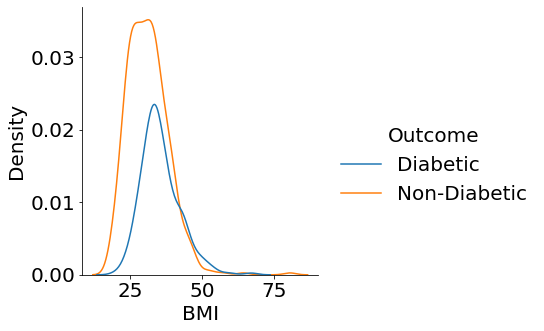

In [23]:
sns.displot(dataframe, x='BMI', hue='Outcome', kind='kde')

In [24]:
### saving the patient details whose Glucose level is normal and are diabetic in a dataframe.
a=dataframe[(dataframe["Glucose"]<=140)&(dataframe["Outcome"]=="Diabetic")]
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000000,62.0,35,36,33.6,0.127,47,Diabetic
3,0,135.000000,68.0,42,250,42.3,0.365,24,Diabetic
11,4,125.000000,70.0,18,122,28.9,1.144,45,Diabetic
20,6,120.892473,68.0,41,36,39.0,0.727,41,Diabetic
28,12,84.000000,72.0,31,36,29.7,0.297,46,Diabetic
...,...,...,...,...,...,...,...,...,...
755,1,128.000000,88.0,39,110,36.5,1.057,37,Diabetic
757,0,123.000000,72.0,23,36,36.3,0.258,52,Diabetic
766,1,126.000000,60.0,23,36,30.1,0.349,47,Diabetic
1559,0,136.000000,74.0,49,220,20.1,0.820,44,Diabetic


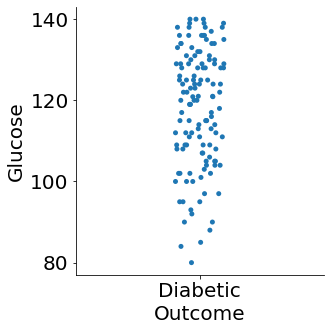

In [25]:
import seaborn as sns
sns.catplot(x="Outcome",y="Glucose",data=a)

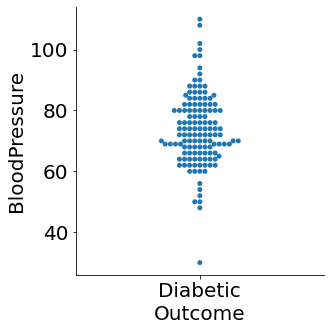

In [26]:
sns.catplot(x="Outcome",y="BloodPressure",data=a, kind="swarm")

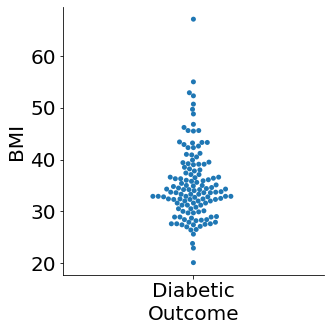

In [27]:
sns.catplot(x="Outcome",y="BMI",data=a, kind="swarm")

In [28]:
z=dataframe[(dataframe["Age"]>=35) & (dataframe["BMI"]>=30)& (dataframe["Outcome"]=="Diabetic")]
z[z["Pregnancies"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,0,180.0,90.0,26,90,36.5,0.314,35,Diabetic
66,0,109.0,88.0,30,36,32.5,0.855,38,Diabetic
440,0,189.0,104.0,25,36,34.3,0.435,41,Diabetic
757,0,123.0,72.0,23,36,36.3,0.258,52,Diabetic


<Figure size 1728x1152 with 0 Axes>

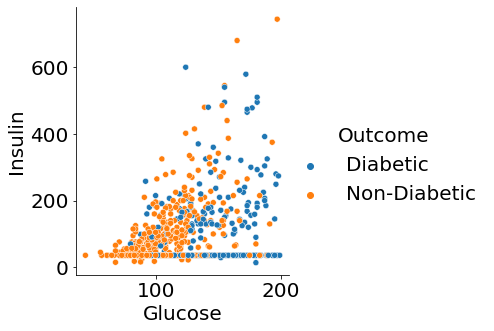

In [29]:
plt.figure(figsize=(24,16))
sns.relplot(x='Glucose',y="Insulin",data=dataframe,hue="Outcome")

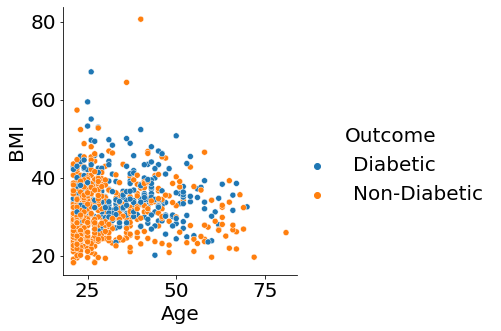

In [30]:
# Age vs BMI
sns.relplot(x='Age',y="BMI",data=dataframe,hue="Outcome")

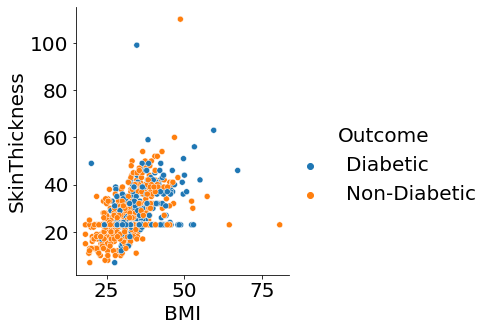

In [31]:
# BMI VS SKINTHICKNESS
sns.relplot(x='BMI',y="SkinThickness",data=dataframe,hue="Outcome")

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

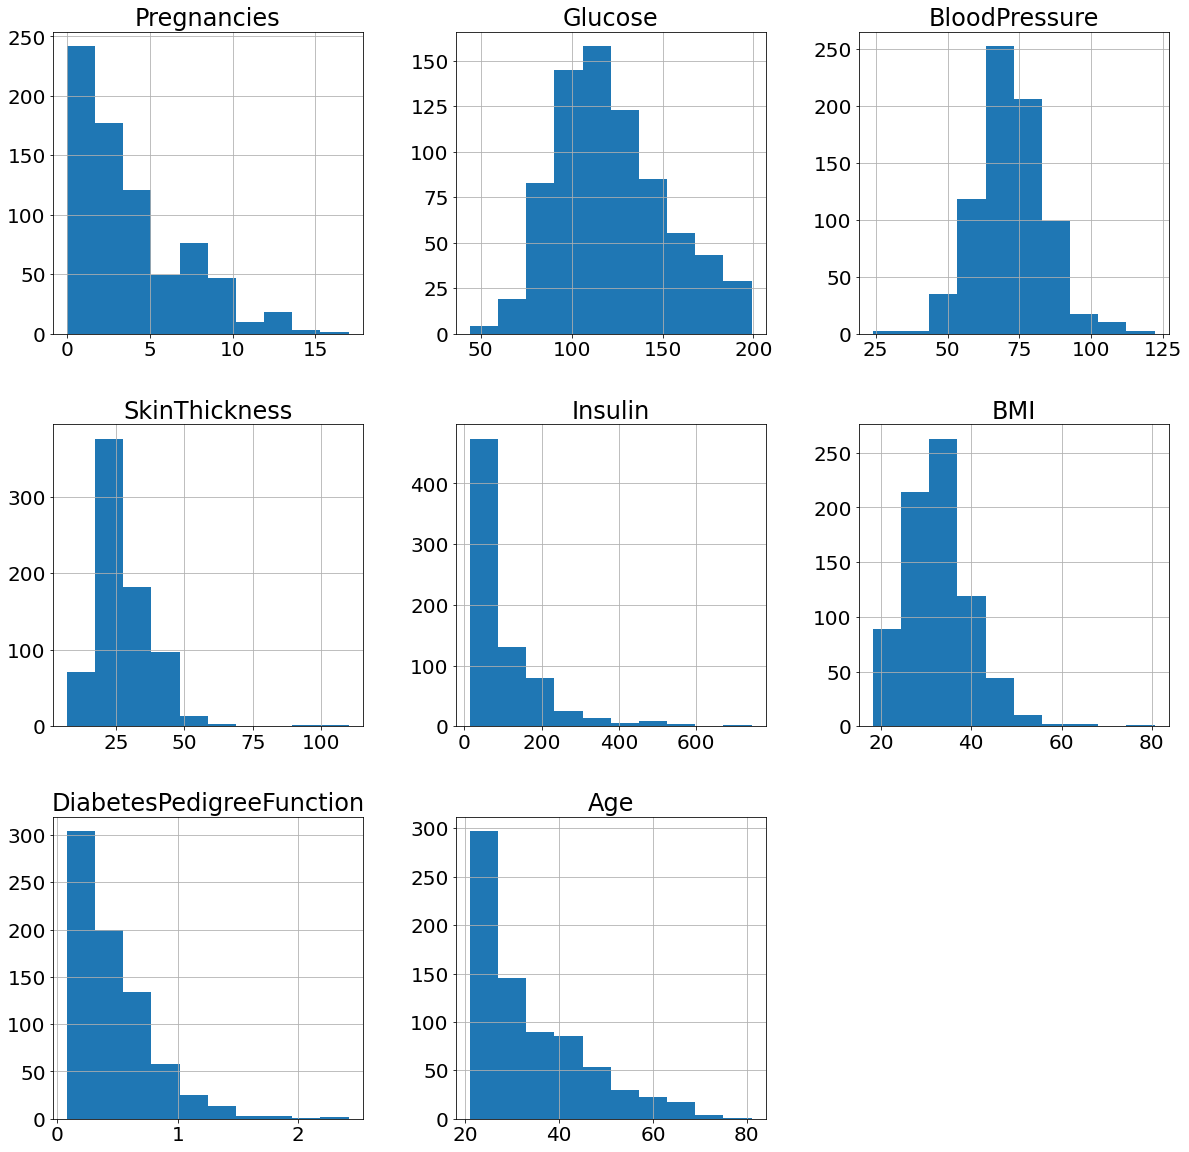

In [32]:
dataframe.hist(figsize = (20,20))

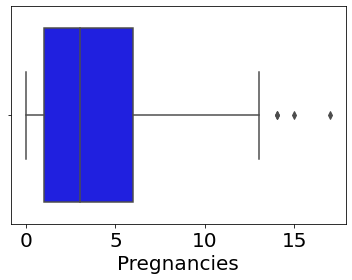

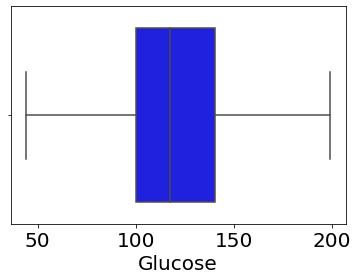

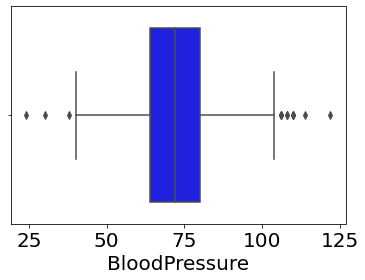

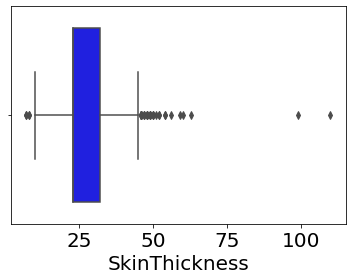

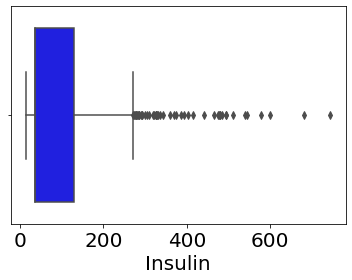

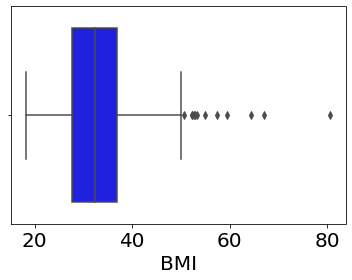

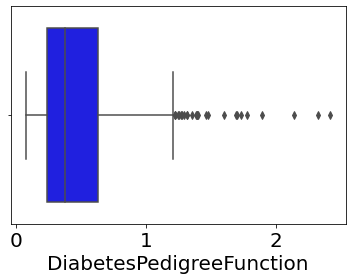

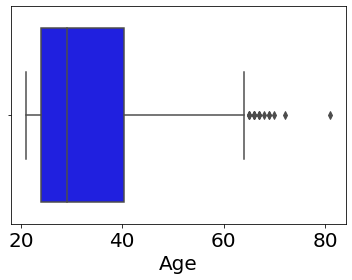

In [33]:
# Using for loop to visualize the boxplot to detect outliers
x = dataframe.drop(['Outcome'],axis = 1) # drop dependent feature and plot the outliers.
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'blue')
    plt.xlabel(i)
    plt.show()

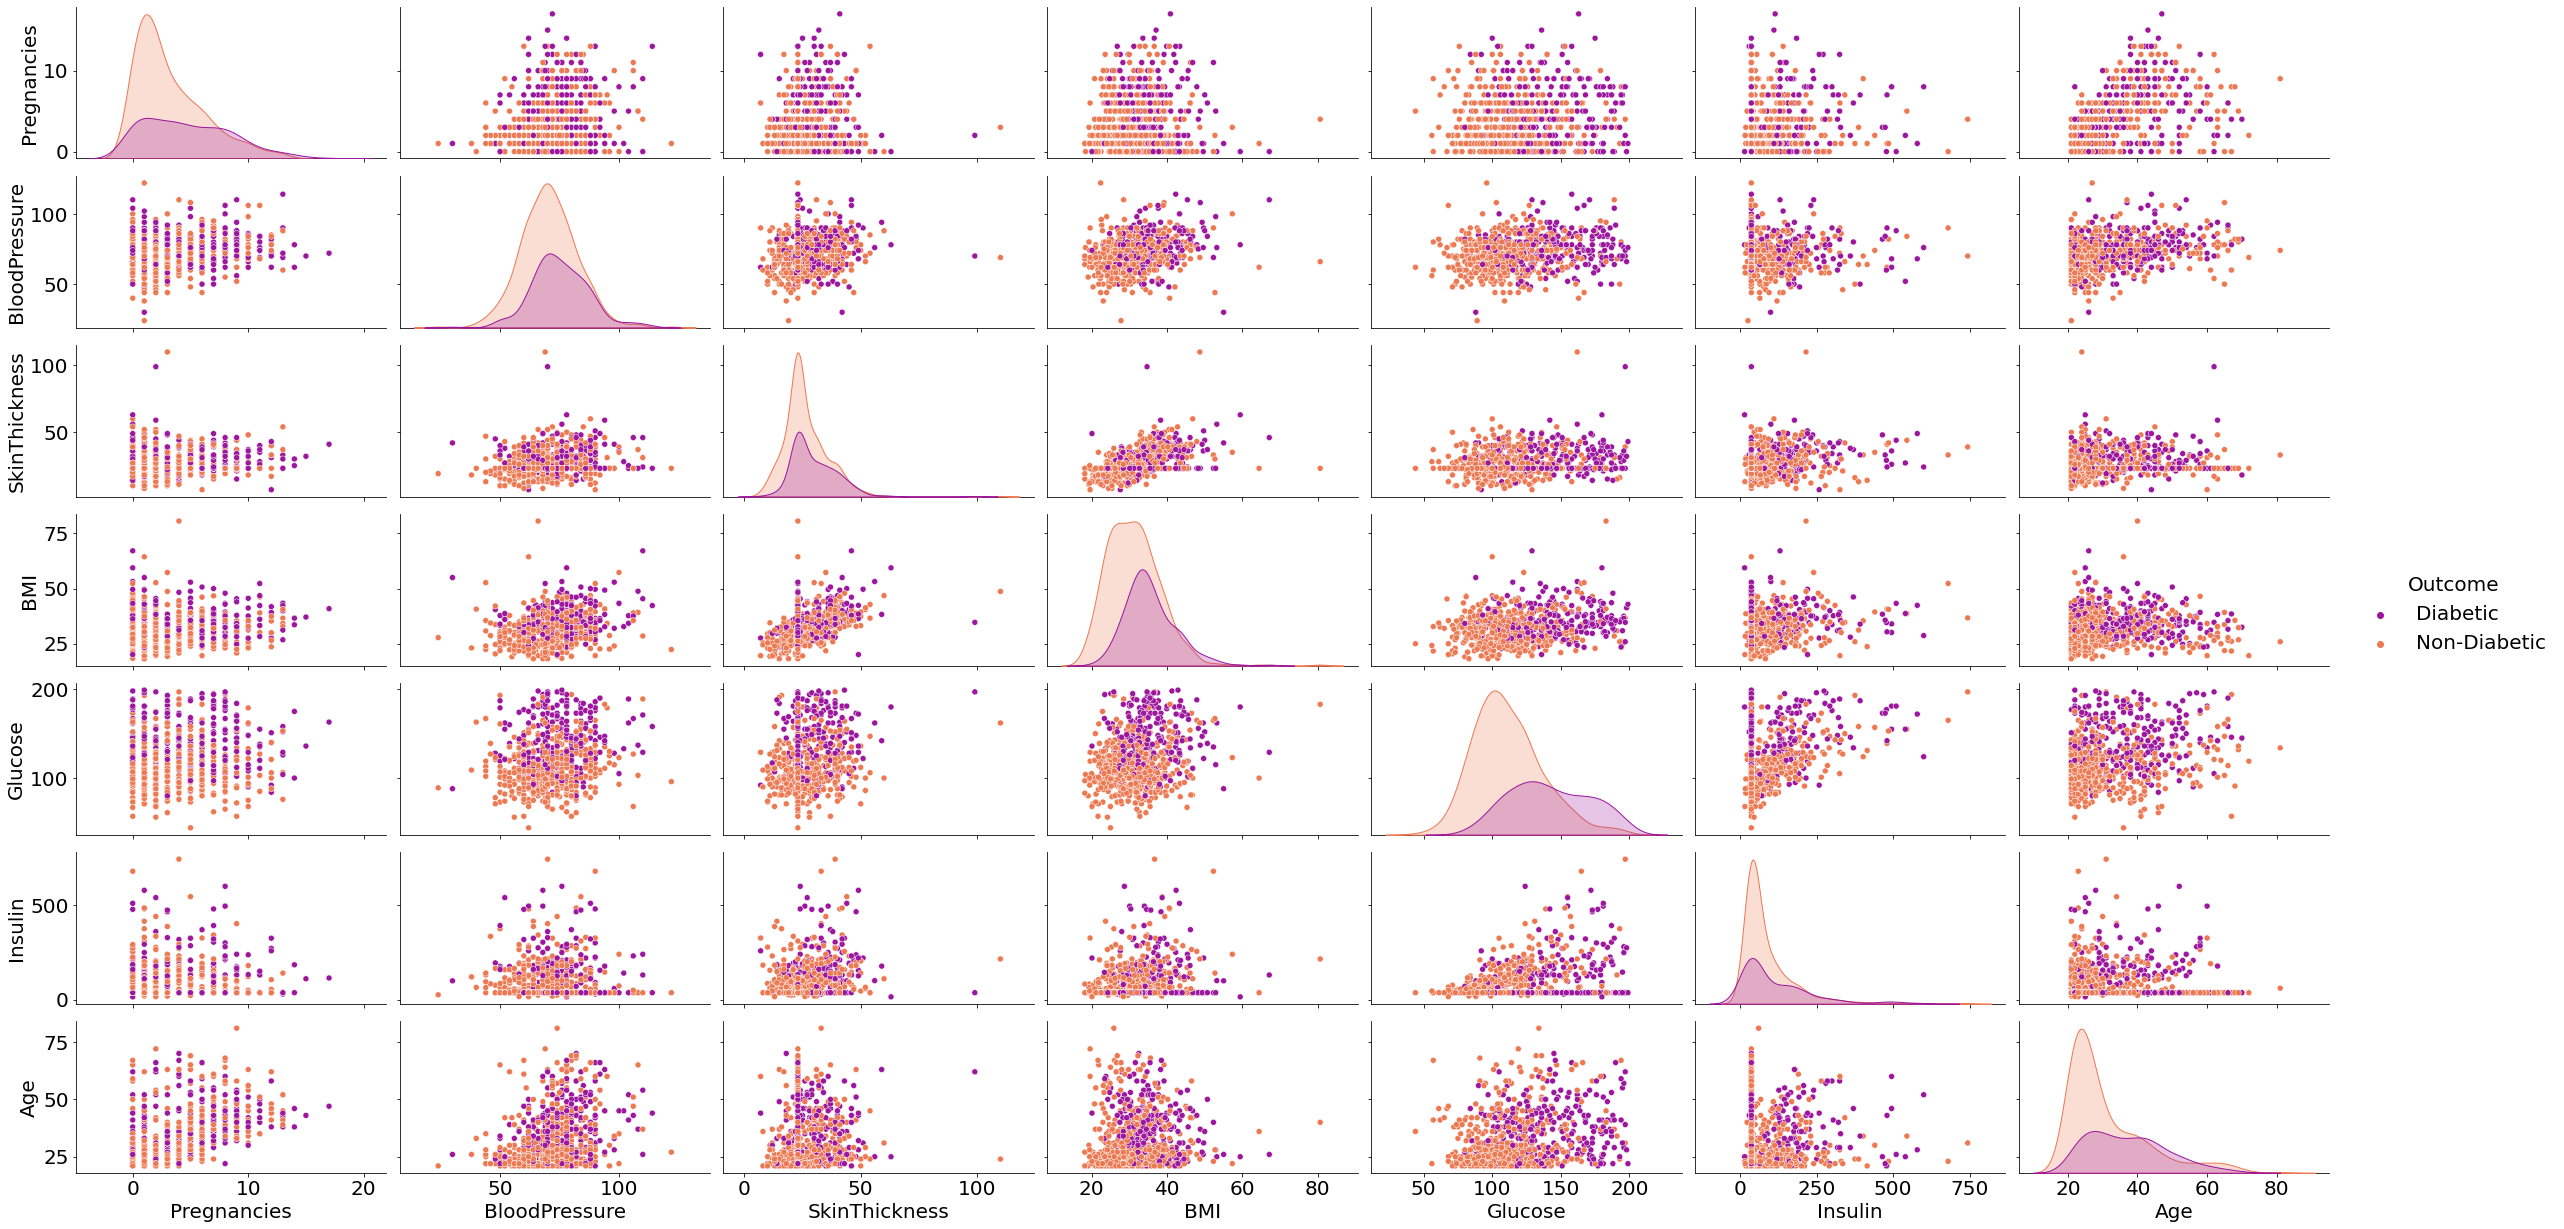

In [34]:
sns.pairplot(dataframe,vars=['Pregnancies','BloodPressure','SkinThickness','BMI','Glucose','Insulin','Age'],hue='Outcome',palette='plasma',aspect=1.9)

In [35]:
dataframe = dataframe.replace({'Outcome': {'Non-Diabetic': 0, 'Diabetic': 1}})
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35,36,33.6,0.127,47,1
1,0,84.0,82.000000,31,125,38.2,0.233,23,0
2,0,145.0,68.959677,23,36,44.2,0.630,31,1
3,0,135.0,68.000000,42,250,42.3,0.365,24,1
4,1,139.0,62.000000,41,480,40.7,0.536,21,0


In [36]:
# Feature Selection
df_selected=dataframe.copy(deep=True)

In [37]:
# Quantile Transformer 
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.395693,0.728802,0.186406,0.796770,0.257739,0.586137,0.030956,0.872140,1.0
1,0.000000,0.081427,0.808883,0.699192,0.738223,0.805518,0.217362,0.202557,0.0
2,0.000000,0.783984,0.399731,0.353970,0.257739,0.941454,0.748318,0.562584,1.0
3,0.000000,0.700538,0.345895,0.927322,0.927322,0.904441,0.487887,0.260431,1.0
4,0.237550,0.738223,0.186406,0.910498,0.986541,0.880888,0.668237,0.000000,0.0


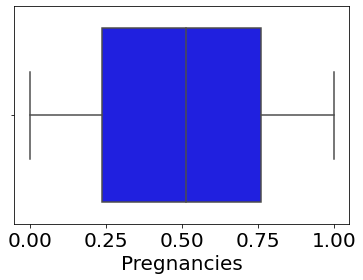

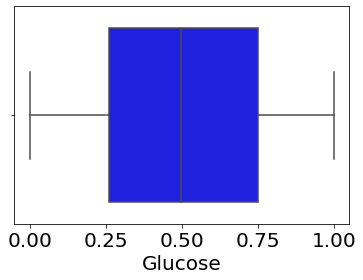

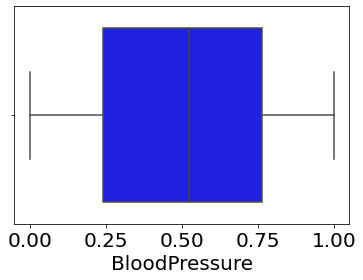

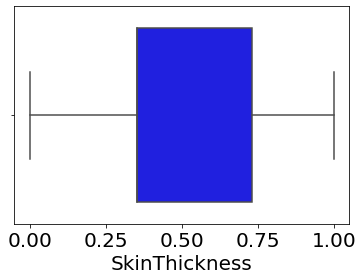

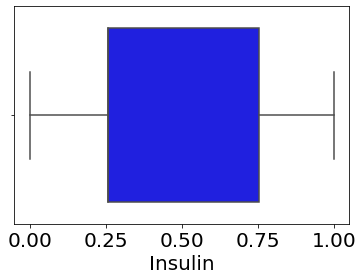

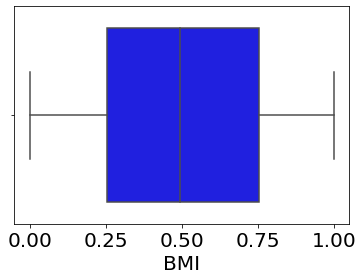

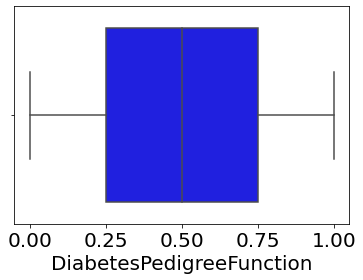

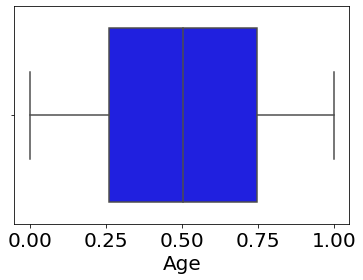

In [38]:
# verify if the outliers are present or not.
x = df_new.drop(['Outcome'],axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'blue') 
    plt.xlabel(i)
    plt.show()

In [39]:
X = df_new.drop(columns='Outcome', axis=1)
Y = df_new['Outcome']

In [40]:
X.head() # independent features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.395693,0.728802,0.186406,0.796770,0.257739,0.586137,0.030956,0.872140
1,0.000000,0.081427,0.808883,0.699192,0.738223,0.805518,0.217362,0.202557
2,0.000000,0.783984,0.399731,0.353970,0.257739,0.941454,0.748318,0.562584
3,0.000000,0.700538,0.345895,0.927322,0.927322,0.904441,0.487887,0.260431
4,0.237550,0.738223,0.186406,0.910498,0.986541,0.880888,0.668237,0.000000


In [41]:
Y.tail()  # Dependent features

739    0.0
740    0.0
741    1.0
742    0.0
743    0.0
Name: Outcome, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=12) 

In [43]:
X_train.shape, y_train.shape

((595, 8), (595,))

In [44]:
X_test.shape, y_test.shape

((149, 8), (149,))

In [45]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 75.46 %
Model Accuracy Score : 78.52 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        90
         1.0       0.83      0.58      0.68        59

    accuracy                           0.79       149
   macro avg       0.80      0.75      0.76       149
weighted avg       0.79      0.79      0.78       149

--------------------------------------------------------


In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 81.18 %
Model Accuracy Score : 77.18 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.83        90
         1.0       0.79      0.58      0.67        59

    accuracy                           0.77       149
   macro avg       0.78      0.74      0.75       149
weighted avg       0.77      0.77      0.76       149

--------------------------------------------------------


In [48]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 65.77 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.79      0.74        90
         1.0       0.59      0.46      0.51        59

    accuracy                           0.66       149
   macro avg       0.64      0.62      0.63       149
weighted avg       0.65      0.66      0.65       149

--------------------------------------------------------


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 84.37 %
Model Accuracy Score : 70.47 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.73      0.82      0.77        90
         1.0       0.66      0.53      0.58        59

    accuracy                           0.70       149
   macro avg       0.69      0.67      0.68       149
weighted avg       0.70      0.70      0.70       149

--------------------------------------------------------


In [50]:
# Create a variable 
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy]})

In [51]:
models.sort_values(by='Model Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy
Logistic Regression,75.460000,78.520000
Support Vector Machines,81.180000,77.180000
KNN,84.370000,70.470000
Decission Tree,100.000000,65.770000


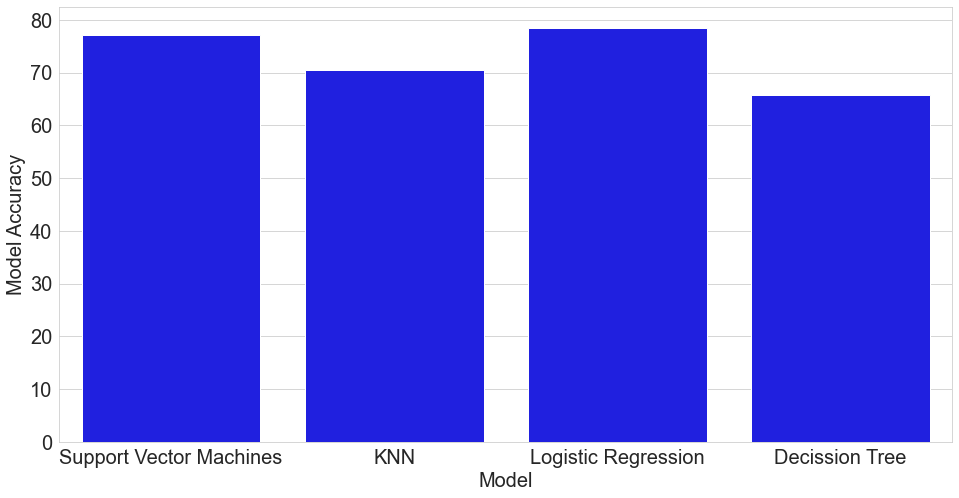

In [53]:
colors = ["blue", "blue", "blue", "blue","blue","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'], palette=colors )
plt.show()